---

<!-- <a href="https://github.com/rraadd88/roux/blob/master/examples/roux_workflow_task.ipynb"><img align="right" style="float:right;" src="https://img.shields.io/badge/-source-cccccc?style=flat-square"></a>
 -->
 
## ⚙️⏩ Running multiple tasks.

### Demo inputs

In [1]:
# demo data
import seaborn as sns
data=sns.load_dataset('iris')
## creating a list of inputs
import itertools
inputs=[{'kws_plot_modified':dict(zip(['x','y'],t))} for t in itertools.permutations(data.select_dtypes(float).columns.tolist(),2)]
inputs

[{'kws_plot_modified': {'x': 'sepal_length', 'y': 'sepal_width'}},
 {'kws_plot_modified': {'x': 'sepal_length', 'y': 'petal_length'}},
 {'kws_plot_modified': {'x': 'sepal_length', 'y': 'petal_width'}},
 {'kws_plot_modified': {'x': 'sepal_width', 'y': 'sepal_length'}},
 {'kws_plot_modified': {'x': 'sepal_width', 'y': 'petal_length'}},
 {'kws_plot_modified': {'x': 'sepal_width', 'y': 'petal_width'}},
 {'kws_plot_modified': {'x': 'petal_length', 'y': 'sepal_length'}},
 {'kws_plot_modified': {'x': 'petal_length', 'y': 'sepal_width'}},
 {'kws_plot_modified': {'x': 'petal_length', 'y': 'petal_width'}},
 {'kws_plot_modified': {'x': 'petal_width', 'y': 'sepal_length'}},
 {'kws_plot_modified': {'x': 'petal_width', 'y': 'sepal_width'}},
 {'kws_plot_modified': {'x': 'petal_width', 'y': 'petal_length'}}]

### Running the tasks

In [ ]:
from roux.workflow.task import run_tasks
parameters_list=run_tasks(
    input_notebook_path='roux_viz_io.ipynb', ## parameterised jupyter notebook (papermill compatible).
    inputs=inputs, ## list of inputs
    output_path_base='tests/output/plot/plot_modified_by_tasks/{KEY}/plot.png', ## base output path, where {KEY} is a unique placeholder for each input.
    kernel='test', ## virtual environment
    force=True, ## rerun by overwritting the outputs
    # test1=True,
    # fast=False, ## parallel processing. set number of workers using the `fast_workers` parameter 
)

## The outputs

In [3]:
output_paths=list(parameters_list.keys())

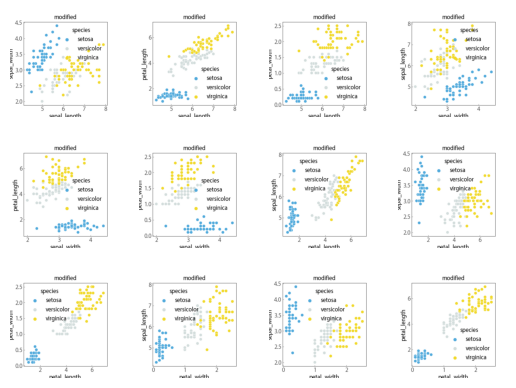

In [4]:
import matplotlib.pyplot as plt
cols=4
fig,axs=plt.subplots(round(len(output_paths)/cols),cols)
for ax,p in zip(axs.ravel(),output_paths):
    ax.imshow(plt.imread(p))
    ax.axis('off')

#### Documentation
[`roux.workflow.task.run_tasks`](https://github.com/rraadd88/roux#module-rouxworkflowtaskrun_tasks)